In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Importing the dataset

In [ ]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


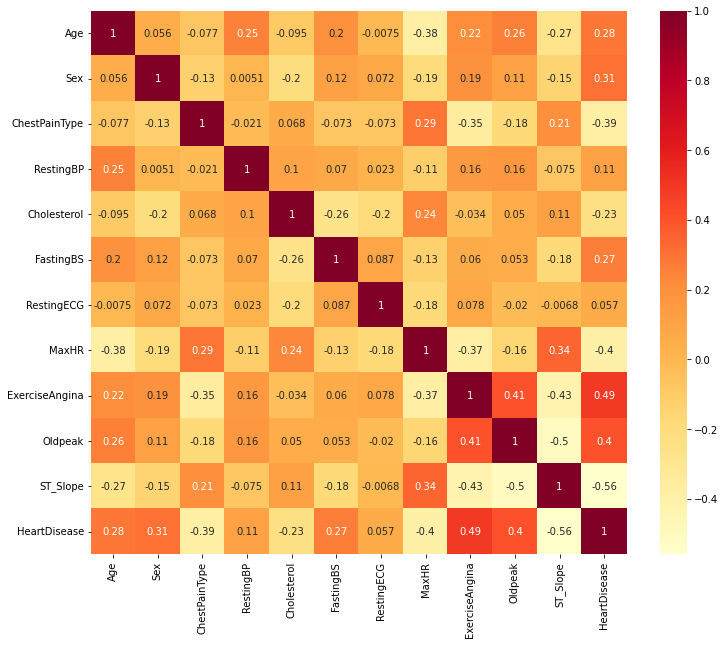

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap= 'YlOrRd')

plt.show()

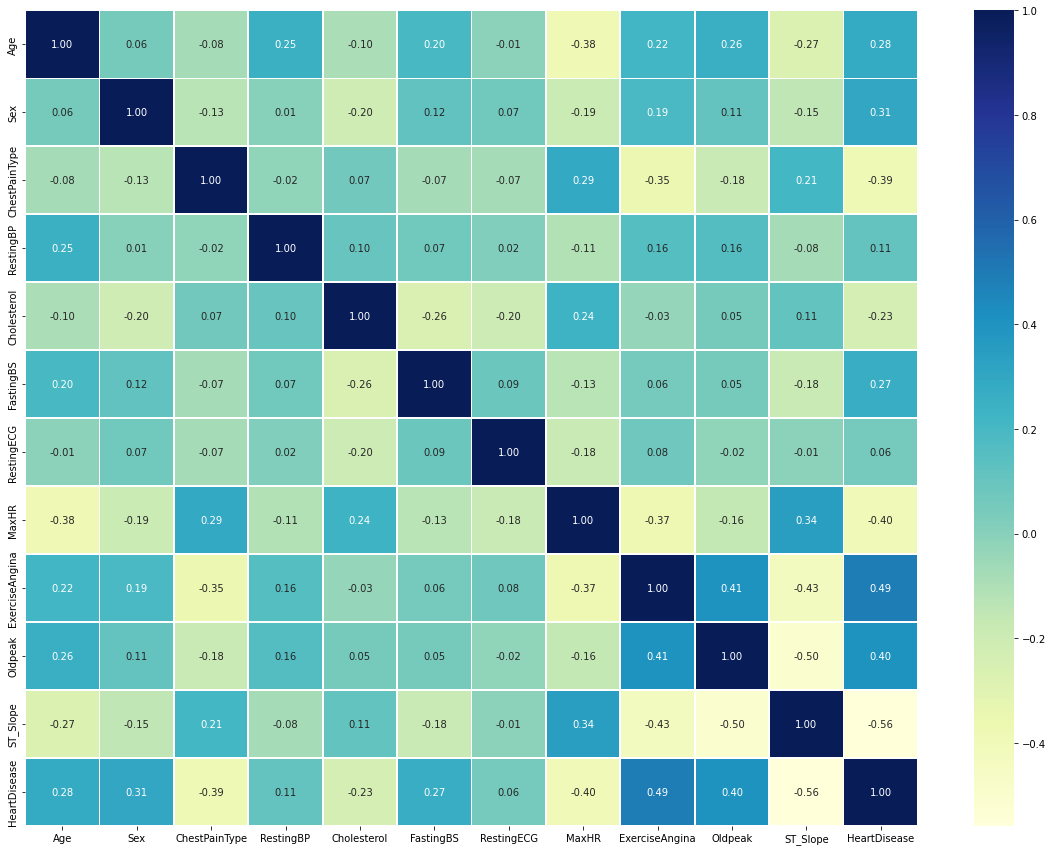

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, linewidths=0.8, fmt=".2f", cmap="YlGnBu");

In [ ]:
#Correlation with output variable
cor_target = abs(corr_matrix["HeartDisease"])
relevant_features = cor_target[cor_target>0.05]
relevant_features

Age               0.282039
Sex               0.305445
ChestPainType     0.386828
RestingBP         0.107589
Cholesterol       0.232741
FastingBS         0.267291
RestingECG        0.057384
MaxHR             0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope          0.558771
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

#Data Visualization

In [ ]:
df['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

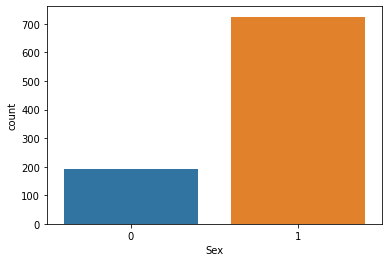

In [ ]:
sns.countplot(x = df['Sex'])

In [ ]:
df['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

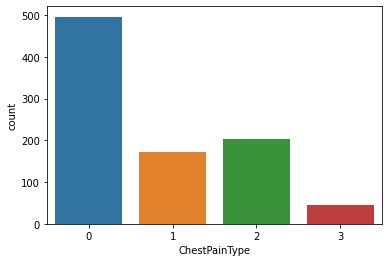

In [ ]:
sns.countplot(x = df['ChestPainType'])

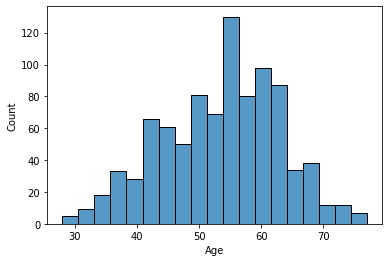

In [ ]:
sns.histplot(df['Age'])

Scatter plot for two variables

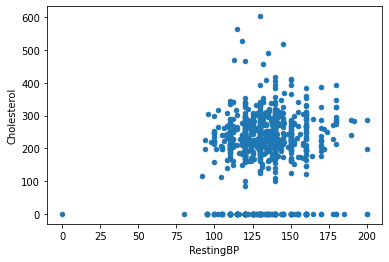

In [ ]:
#plot the scatter plot of RestingBP and Cholesterol variable in data
df.plot.scatter(x="RestingBP",y="Cholesterol")
plt.show()

Pair plot

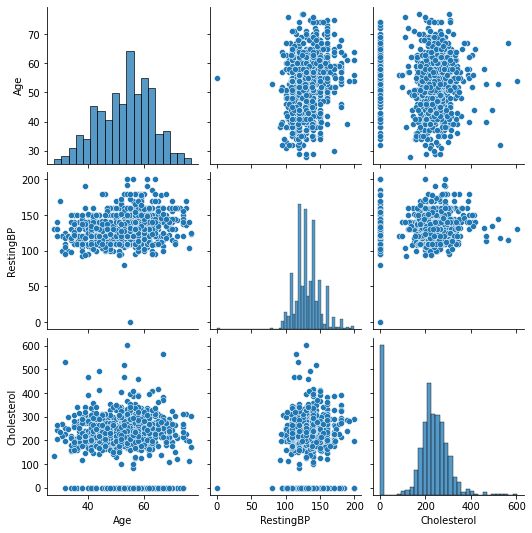

In [ ]:
#plot the pair plot of RestingBP, Cholesterol and age in data dataframe.
sns.pairplot(data = df, vars=['Age','RestingBP','Cholesterol'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


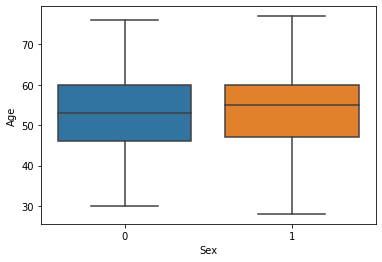

In [ ]:
#plot the box plot of Age for Male & Female patients
sns.boxplot(df.Sex, df.Age)
plt.show()

In [ ]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

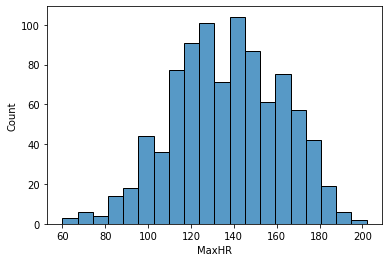

In [ ]:
sns.histplot(df['MaxHR'])

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1].values

In [ ]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [ ]:
print(x.shape)

(918, 11)


In [ ]:
print(y.shape)

(918,)


#Information Criteria

In [ ]:
from sklearn.feature_selection import mutual_info_classif as mic

mi_score = mic(x,y)
print(mi_score)

[0.04193627 0.05851739 0.17167943 0.02950102 0.09185485 0.04978272
 0.         0.07872083 0.12224658 0.10437403 0.2097562 ]


In [ ]:
from sklearn.model_selection import train_test_split

x_train_1, x_test_1, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 0)

In [ ]:
print(x_train_1)

[[66.   0.   2.  ...  0.   0.   1. ]
 [57.   1.   0.  ...  1.   3.   1. ]
 [39.   0.   2.  ...  0.   0.   2. ]
 ...
 [61.   1.   2.  ...  1.   1.3  1. ]
 [47.   1.   2.  ...  1.   1.   1. ]
 [48.   1.   2.  ...  0.   0.   2. ]]


In [ ]:
print(x_test_1)

[[52.   1.   0.  ...  1.   0.   2. ]
 [49.   1.   1.  ...  0.   0.   2. ]
 [56.   1.   0.  ...  1.   1.2  1. ]
 ...
 [41.   0.   1.  ...  0.   0.   2. ]
 [59.   1.   2.  ...  0.   0.   2. ]
 [54.   0.   1.  ...  0.   0.   2. ]]


In [ ]:
print(y_train)

[0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 0 0 0 0 

In [ ]:
print(y_test)

[1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1
 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 1 1 1 0 0 0 0]


Dataset 2 with features have MI scores larger than 0.05

In [ ]:
mi_score_selected_index = np.where(mi_score >0.05)[0]

x_2 = x[:,mi_score_selected_index]

x_train_2, x_test_2, y_train, y_test = train_test_split(x_2,y ,random_state=0, stratify=y)

In [ ]:
mi_score_selected_index

array([ 1,  2,  4,  7,  8,  9, 10])

Dataset 3 with features have MI scores lesser than 0.05

In [ ]:
mi_score_selected_index = np.where(mi_score <0.05)[0]

x_3 = x[:,mi_score_selected_index]

x_train_3, x_test_3, y_train, y_test = train_test_split(x_2,y ,random_state=0, stratify=y)

In [ ]:
mi_score_selected_index

array([0, 3, 5, 6])

Compare the three datasets with Logistic Regression

In [ ]:
#Compare the 3 datasets with the Logistic Regression
from sklearn.linear_model import LogisticRegression as logr
model_11 = logr().fit(x_train_1,y_train)
model_22 = logr().fit(x_train_2,y_train)
model_33 = logr().fit(x_train_3,y_train)
score_11 = model_11.score(x_test_1,y_test)
score_22 = model_22.score(x_test_2,y_test)
score_33 = model_33.score(x_test_3,y_test)
print(f"score_1:{score_11}\n score_2:{score_22}\n score_3:{score_33}")

score_1:0.8565217391304348
 score_2:0.8434782608695652
 score_3:0.8434782608695652


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
model_scores = {"Model_1":score_11, "Model_2":score_22,"Model_3":score_33}

In [ ]:
model_scores

{'Model_1': 0.8565217391304348,
 'Model_2': 0.8434782608695652,
 'Model_3': 0.8434782608695652}

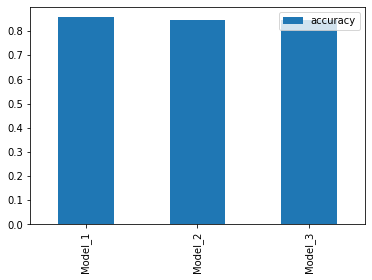

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [ ]:
# Match features to columns
features_dict = dict(zip(x.columns, list(model_33.coef_[0])))
features_dict

{'Age': 1.5409147992505248,
 'ChestPainType': -0.003970385931984017,
 'Cholesterol': 0.9664817968093424,
 'FastingBS': 0.4312125322231208,
 'RestingBP': -0.01135685701889704,
 'RestingECG': -1.5881164953375804,
 'Sex': -0.6410966388538841}

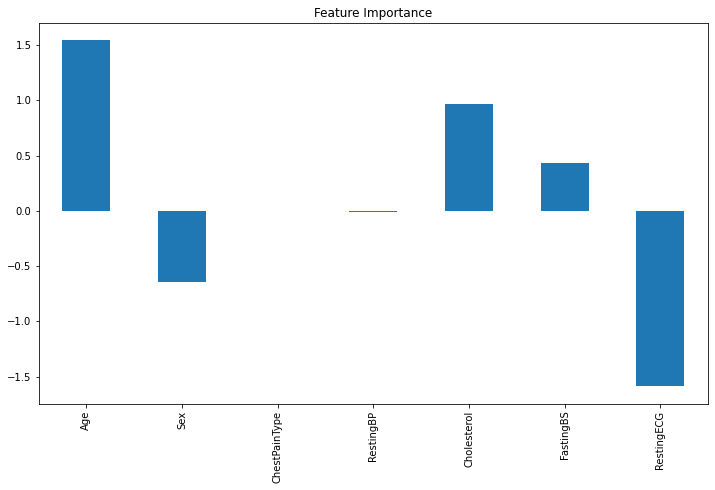

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(12,7));